In [3]:
import os
import json
import math

import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

In [1]:
path = 'save_results_completion_permutations_{len}_scrambled.json'

In [4]:
res = json.load(open(path, 'r'))

In [5]:
len(res['permutations'])

907

In [6]:
list_outputs = []
permutations = []
justifications = []
for (i1, lo), (i2, p) in zip(res['list_outputs'], res['permutations']):
    if len(lo) == 5:
        list_outputs.append((i1, lo))
        permutations.append((i2, p))
len(list_outputs)

907

In [7]:
res['list_outputs'] = list_outputs
res['permutations'] = permutations

In [8]:
len(res['permutations'])

907

In [9]:
res['list_outputs']

[(0, [4, 0, 3, 1, 2]),
 (1, [1, 2, 3, 4, 0]),
 (2, [2, 3, 1, 4, 0]),
 (3, [4, 1, 3, 0, 2]),
 (4, [0, 3, 1, 4, 2]),
 (5, [3, 4, 2, 0, 1]),
 (6, [2, 3, 1, 0, 4]),
 (7, [4, 1, 0, 2, 3]),
 (9, [0, 3, 1, 2, 4]),
 (10, [0, 1, 2, 4, 3]),
 (11, [1, 4, 0, 3, 2]),
 (12, [0, 2, 4, 1, 3]),
 (13, [0, 1, 4, 2, 3]),
 (14, [4, 1, 0, 3, 2]),
 (15, [0, 1, 2, 3, 4]),
 (16, [0, 3, 4, 1, 2]),
 (17, [0, 1, 2, 3, 4]),
 (18, [0, 1, 3, 2, 4]),
 (20, [0, 1, 2, 3, 4]),
 (21, [0, 1, 2, 3, 4]),
 (23, [0, 1, 2, 3, 4]),
 (24, [0, 3, 4, 2, 1]),
 (25, [0, 2, 3, 1, 4]),
 (26, [0, 1, 2, 3, 4]),
 (27, [3, 1, 4, 0, 2]),
 (29, [2, 4, 1, 3, 0]),
 (30, [2, 1, 0, 4, 3]),
 (31, [2, 0, 1, 4, 3]),
 (32, [0, 4, 1, 3, 2]),
 (33, [2, 3, 0, 4, 1]),
 (34, [2, 1, 4, 3, 0]),
 (35, [0, 1, 3, 2, 4]),
 (36, [0, 1, 2, 3, 4]),
 (37, [2, 0, 3, 4, 1]),
 (38, [0, 1, 2, 3, 4]),
 (39, [0, 2, 3, 1, 4]),
 (40, [2, 3, 1, 4, 0]),
 (41, [0, 1, 2, 3, 4]),
 (42, [0, 3, 1, 2, 4]),
 (43, [0, 2, 3, 4, 1]),
 (45, [3, 2, 4, 1, 0]),
 (46, [4, 0, 3, 2, 1]),
 

In [10]:
len(res['unique'])

116

In [11]:
print(f'{len(res["unique"]) / math.factorial(5) * 100:.2f}% of permutations are filled.')

96.67% of permutations are filled.


In [12]:
perms = [p for _, p in res['list_outputs']]

In [13]:
# are there any biases in absolute order?
# Thank mr chatgpt
def plot_permutations(perms, n=5, title=None):
    if title is None:
        title = 'Proportion of each index at each position in permutations'
    # Initialize a 2D list to hold frequency counts for each index at each position
    # 5 positions, with 5 possible indices at each position
    freq_counts = np.zeros((n, n))

    # Iterate over each permutation
    for perm in perms:
        for pos, index in enumerate(perm):
            # Increment the count for the index at the current position
            freq_counts[pos, index] += 1

    # Normalize the counts to get proportions
    freq_counts /= len(perms)
    std_devs = np.std(freq_counts, axis=1)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = np.arange(n)  # Positions in the permutation
    bar_width = 0.15  # Width of the bars

    # Plot a bar for each index at each position
    for i in range(5):
        ax.bar(positions + i * bar_width, freq_counts[:, i], width=bar_width, label=f'Index {i}',
           yerr=std_devs, capsize=5)

    # Formatting the plot
    ax.set_xlabel('Position in permutation')
    ax.set_ylabel('Proportion')
    ax.set_title(title)
    ax.set_xticks(positions + bar_width * 2)
    ax.set_xticklabels([f'Position {i}' for i in range(n)])
    ax.legend()

    plt.tight_layout()
    plt.show()

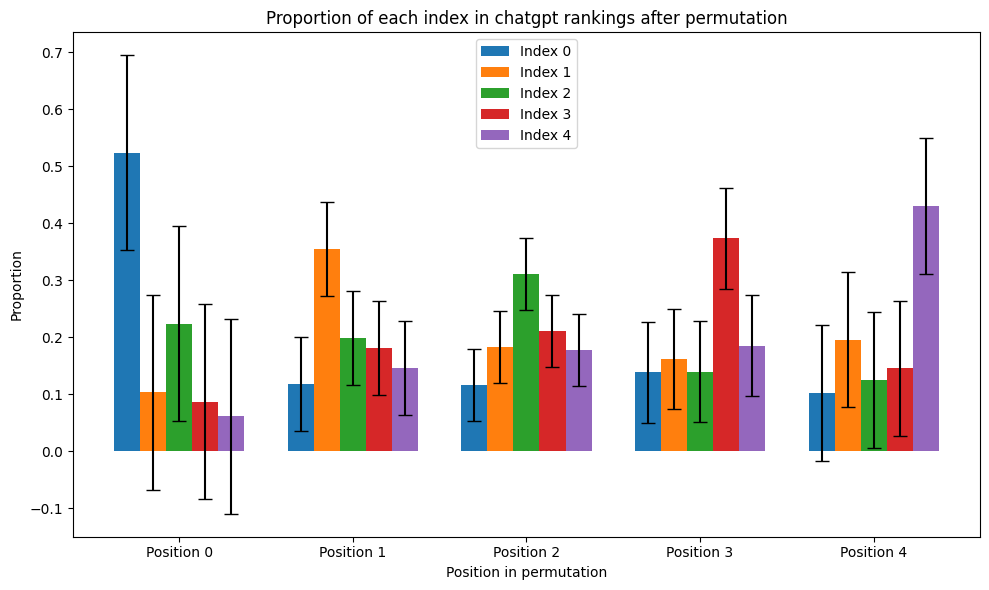

In [14]:
plot_permutations(perms, title='Proportion of each index in chatgpt rankings after permutation')

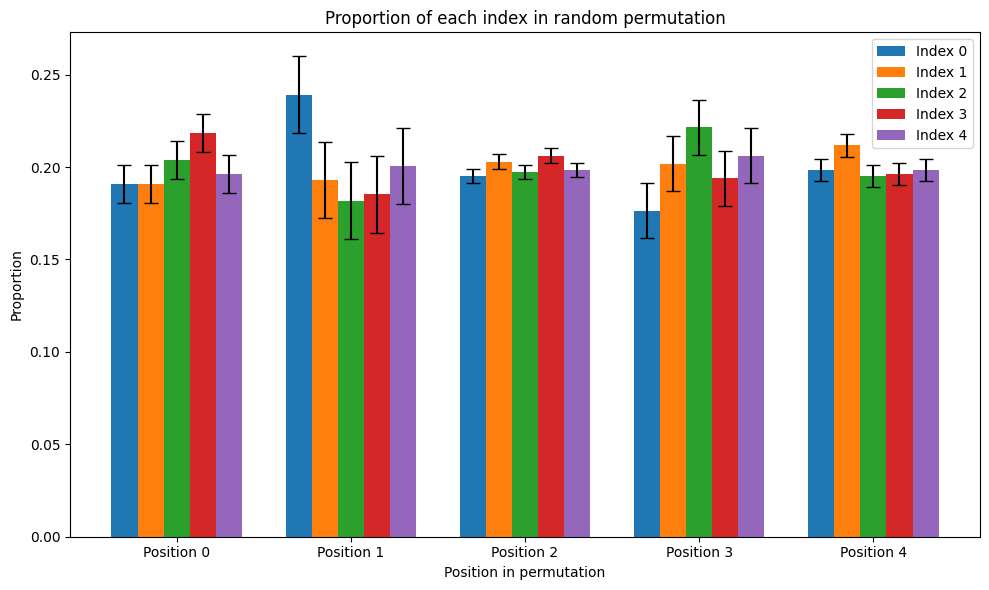

In [15]:
# ground truth permutation stats
perms_gt = [p for _, p in res['permutations']]
plot_permutations(perms_gt, title='Proportion of each index in random permutation')

In [16]:
len(perms)

907

In [17]:
def apply_permutation(l, perm):
    return [l[i] for i in perm]

In [18]:
l = [2, 3, 0, 4, 1]
perm = [0, 1, 2, 3, 4]
apply_permutation(l, perm)

[2, 3, 0, 4, 1]

In [19]:
apply_permutation(l, [4, 3, 2, 1, 0])

[1, 4, 0, 3, 2]

In [20]:
print(len(res['permutations']))
print(len(res['list_outputs']))

907
907


In [21]:
actual_rankings = [apply_permutation(l, perm) for (_, l), (_, perm) in zip(res['list_outputs'], res['permutations'])]

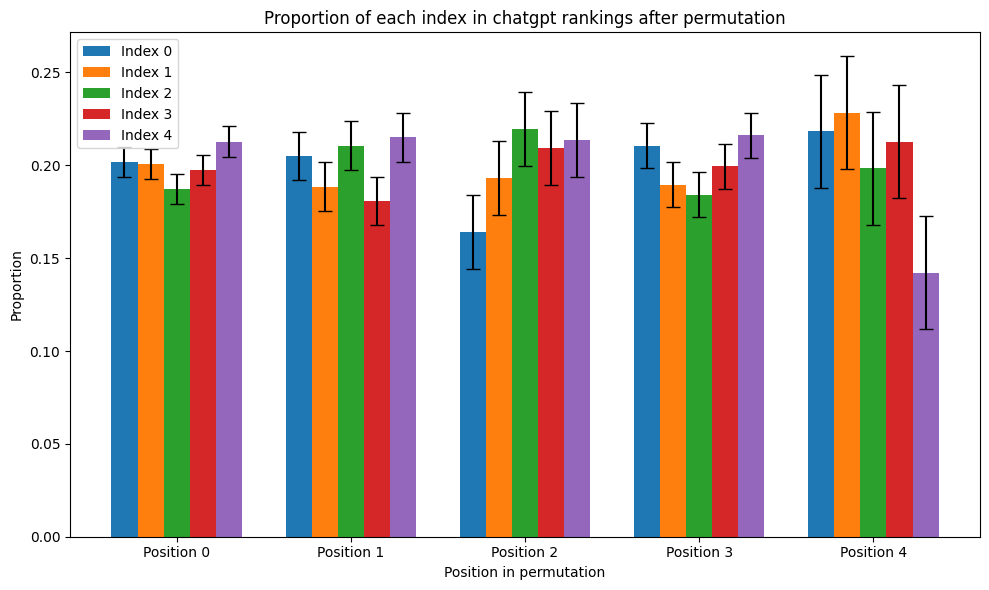

In [22]:
plot_permutations(actual_rankings, title='Proportion of each index in chatgpt rankings after permutation')

In [59]:
print(all([len(perm) == 5 for _, perm in res['list_outputs']]))

True


In [113]:
# rank permutations by count
def perm_to_str(perm):
    return ''.join([str(el) for el in perm])

perm_counter = Counter()
for _, p in res['list_outputs']:
    perm_counter[perm_to_str(p)] += 1

In [114]:
# rank permutations by least to most likely
sorted_perms = sorted(list(perm_counter.items()), key=lambda x: x[1])[::-1]

In [117]:
sorted_perms

[('23104', 22),
 ('21403', 21),
 ('13402', 19),
 ('23401', 18),
 ('23041', 17),
 ('21304', 17),
 ('41023', 17),
 ('24031', 17),
 ('24301', 16),
 ('20314', 16),
 ('41032', 16),
 ('21034', 16),
 ('30214', 15),
 ('02314', 14),
 ('14203', 14),
 ('23014', 14),
 ('30124', 14),
 ('14302', 14),
 ('32041', 14),
 ('20134', 13),
 ('20413', 13),
 ('24013', 13),
 ('31402', 12),
 ('01324', 12),
 ('14023', 12),
 ('14032', 12),
 ('02134', 11),
 ('21043', 11),
 ('24103', 11),
 ('01234', 11),
 ('32014', 11),
 ('20431', 10),
 ('20341', 10),
 ('31204', 10),
 ('13042', 10),
 ('41302', 10),
 ('12403', 9),
 ('21430', 9),
 ('13024', 9),
 ('10324', 9),
 ('23140', 9),
 ('31024', 9),
 ('31420', 9),
 ('32104', 9),
 ('24130', 8),
 ('42031', 8),
 ('30412', 8),
 ('10234', 8),
 ('12304', 8),
 ('14230', 8),
 ('32401', 8),
 ('42103', 7),
 ('34201', 7),
 ('40213', 7),
 ('20143', 7),
 ('34102', 7),
 ('12340', 7),
 ('02143', 6),
 ('12034', 6),
 ('24310', 6),
 ('13420', 6),
 ('02413', 6),
 ('40123', 6),
 ('40132', 6),
 ('0

In [89]:
perm_counter['01234']

1

In [61]:
uperms = []
for p in res['permutations']:
    if p not in uperms:
        uperms.append(p)

print(len(uperms) / len(res['permutations']))

1.0


In [75]:
rng_perms = json.load(open('chatgpt_rng.json'))

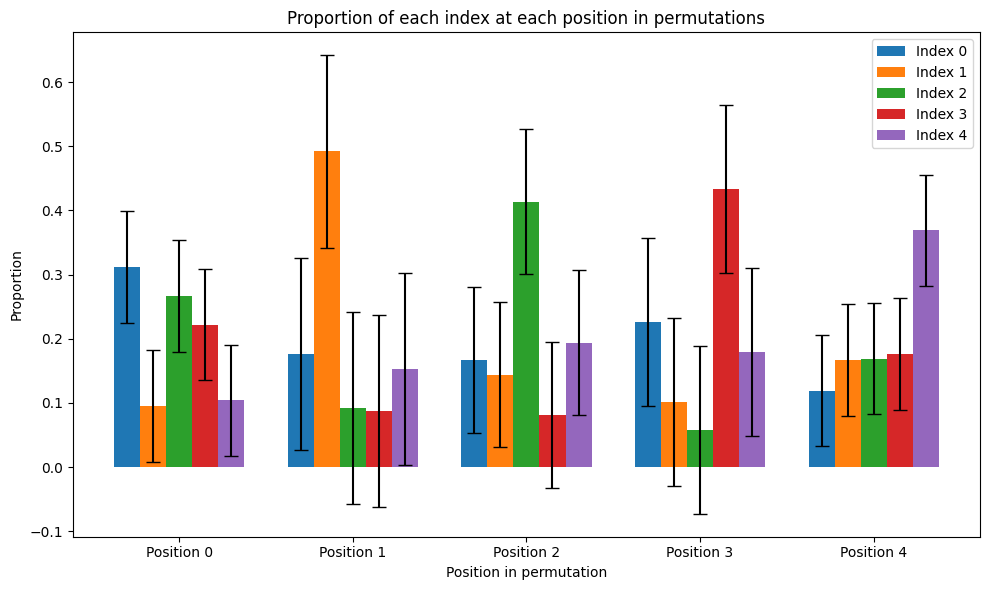

In [76]:
plot_permutations([p for _, p in rng_perms])

In [69]:
len(rng_perms)

100

In [70]:
urng_perms = []
for _, p in rng_perms:
    if p not in urng_perms:
        urng_perms.append(p)
print(len(urng_perms))

38


In [77]:
perm_counter = Counter()
for _, p in rng_perms:
    perm_counter[perm_to_str(p)] += 1
sorted_perms = sorted(list(perm_counter.items()), key=lambda x: x[1])[::-1]

In [78]:
sorted_perms

[('01234', 312),
 ('31402', 44),
 ('24031', 28),
 ('24103', 26),
 ('20413', 25),
 ('30241', 24),
 ('21403', 24),
 ('13042', 21),
 ('24130', 21),
 ('31042', 17),
 ('32041', 16),
 ('42103', 16),
 ('20431', 15),
 ('40213', 14),
 ('23041', 14),
 ('30142', 14),
 ('30412', 14),
 ('30421', 14),
 ('14203', 14),
 ('21430', 13),
 ('21304', 11),
 ('21340', 11),
 ('42130', 10),
 ('23140', 10),
 ('14032', 10),
 ('20341', 10),
 ('32140', 9),
 ('31204', 9),
 ('21043', 9),
 ('24310', 8),
 ('31240', 8),
 ('42031', 8),
 ('42013', 8),
 ('41302', 8),
 ('34102', 7),
 ('20143', 7),
 ('23104', 7),
 ('32401', 7),
 ('41203', 7),
 ('30214', 7),
 ('14302', 7),
 ('24301', 7),
 ('13402', 7),
 ('23401', 6),
 ('13240', 6),
 ('40321', 6),
 ('34021', 5),
 ('24013', 5),
 ('41023', 5),
 ('31420', 5),
 ('20314', 5),
 ('10423', 5),
 ('32104', 4),
 ('14023', 4),
 ('40312', 4),
 ('31024', 3),
 ('10432', 3),
 ('12430', 3),
 ('40132', 3),
 ('13204', 3),
 ('32410', 3),
 ('21034', 3),
 ('34201', 3),
 ('34120', 3),
 ('43102', 3)